In [1]:
#libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import math
import seaborn as sns
import random
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import add_constant

In [2]:
#save data into dataframe 
df = pd.read_csv('delhi_aqi.csv',parse_dates=True)
#description of data set 
df.describe().round(2)

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.00,18776.00,18776.00,18776.00,18776.00,18776.00,18776.00,18776.00
mean,2929.23,33.66,66.22,60.35,66.69,238.13,300.09,25.11
std,2854.52,62.13,48.53,80.46,49.44,226.53,267.17,26.40
min,260.35,0.00,4.28,0.00,5.25,11.83,15.07,0.00
25%,1068.12,0.68,33.93,0.34,34.81,84.44,118.80,9.63
50%,1842.50,5.25,54.15,27.18,52.93,157.44,209.70,17.48
75%,3685.00,35.76,83.63,92.98,82.02,313.00,387.96,30.40
max,21148.68,500.68,460.62,801.09,579.83,1708.09,1969.93,287.77


In [3]:
#check if any missing data 
print(df.isna().sum())

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [4]:
#create a new dataset without date 
df_n= df.select_dtypes(include='number') 

a

In [5]:
#get a correlations
df_n.corr()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
co,1.000000,0.914129,0.764201,-0.402284,0.534227,0.936830,0.950218,0.784951
no,0.914129,1.000000,0.557712,-0.354905,0.498719,0.816441,0.829910,0.724342
no2,0.764201,0.557712,1.000000,-0.343609,0.710371,0.701840,0.711998,0.718399
o3,-0.402284,-0.354905,-0.343609,1.000000,0.013204,-0.286661,-0.294825,-0.275983
so2,0.534227,0.498719,0.710371,0.013204,1.000000,0.488476,0.491889,0.628444
pm2_5,0.936830,0.816441,0.701840,-0.286661,0.488476,1.000000,0.989291,0.644446
pm10,0.950218,0.829910,0.711998,-0.294825,0.491889,0.989291,1.000000,0.686081
nh3,0.784951,0.724342,0.718399,-0.275983,0.628444,0.644446,0.686081,1.000000


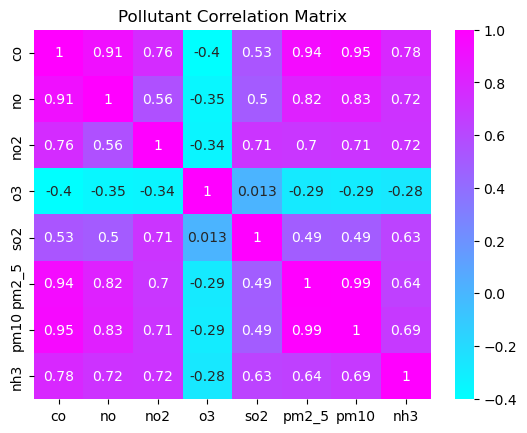

In [6]:
#creating heatmap
sns.heatmap(df_n.corr(),annot=True,cmap='cool')
plt.title('Pollutant Correlation Matrix')
plt.savefig("correlation_heatmap.pdf")  
plt.show()

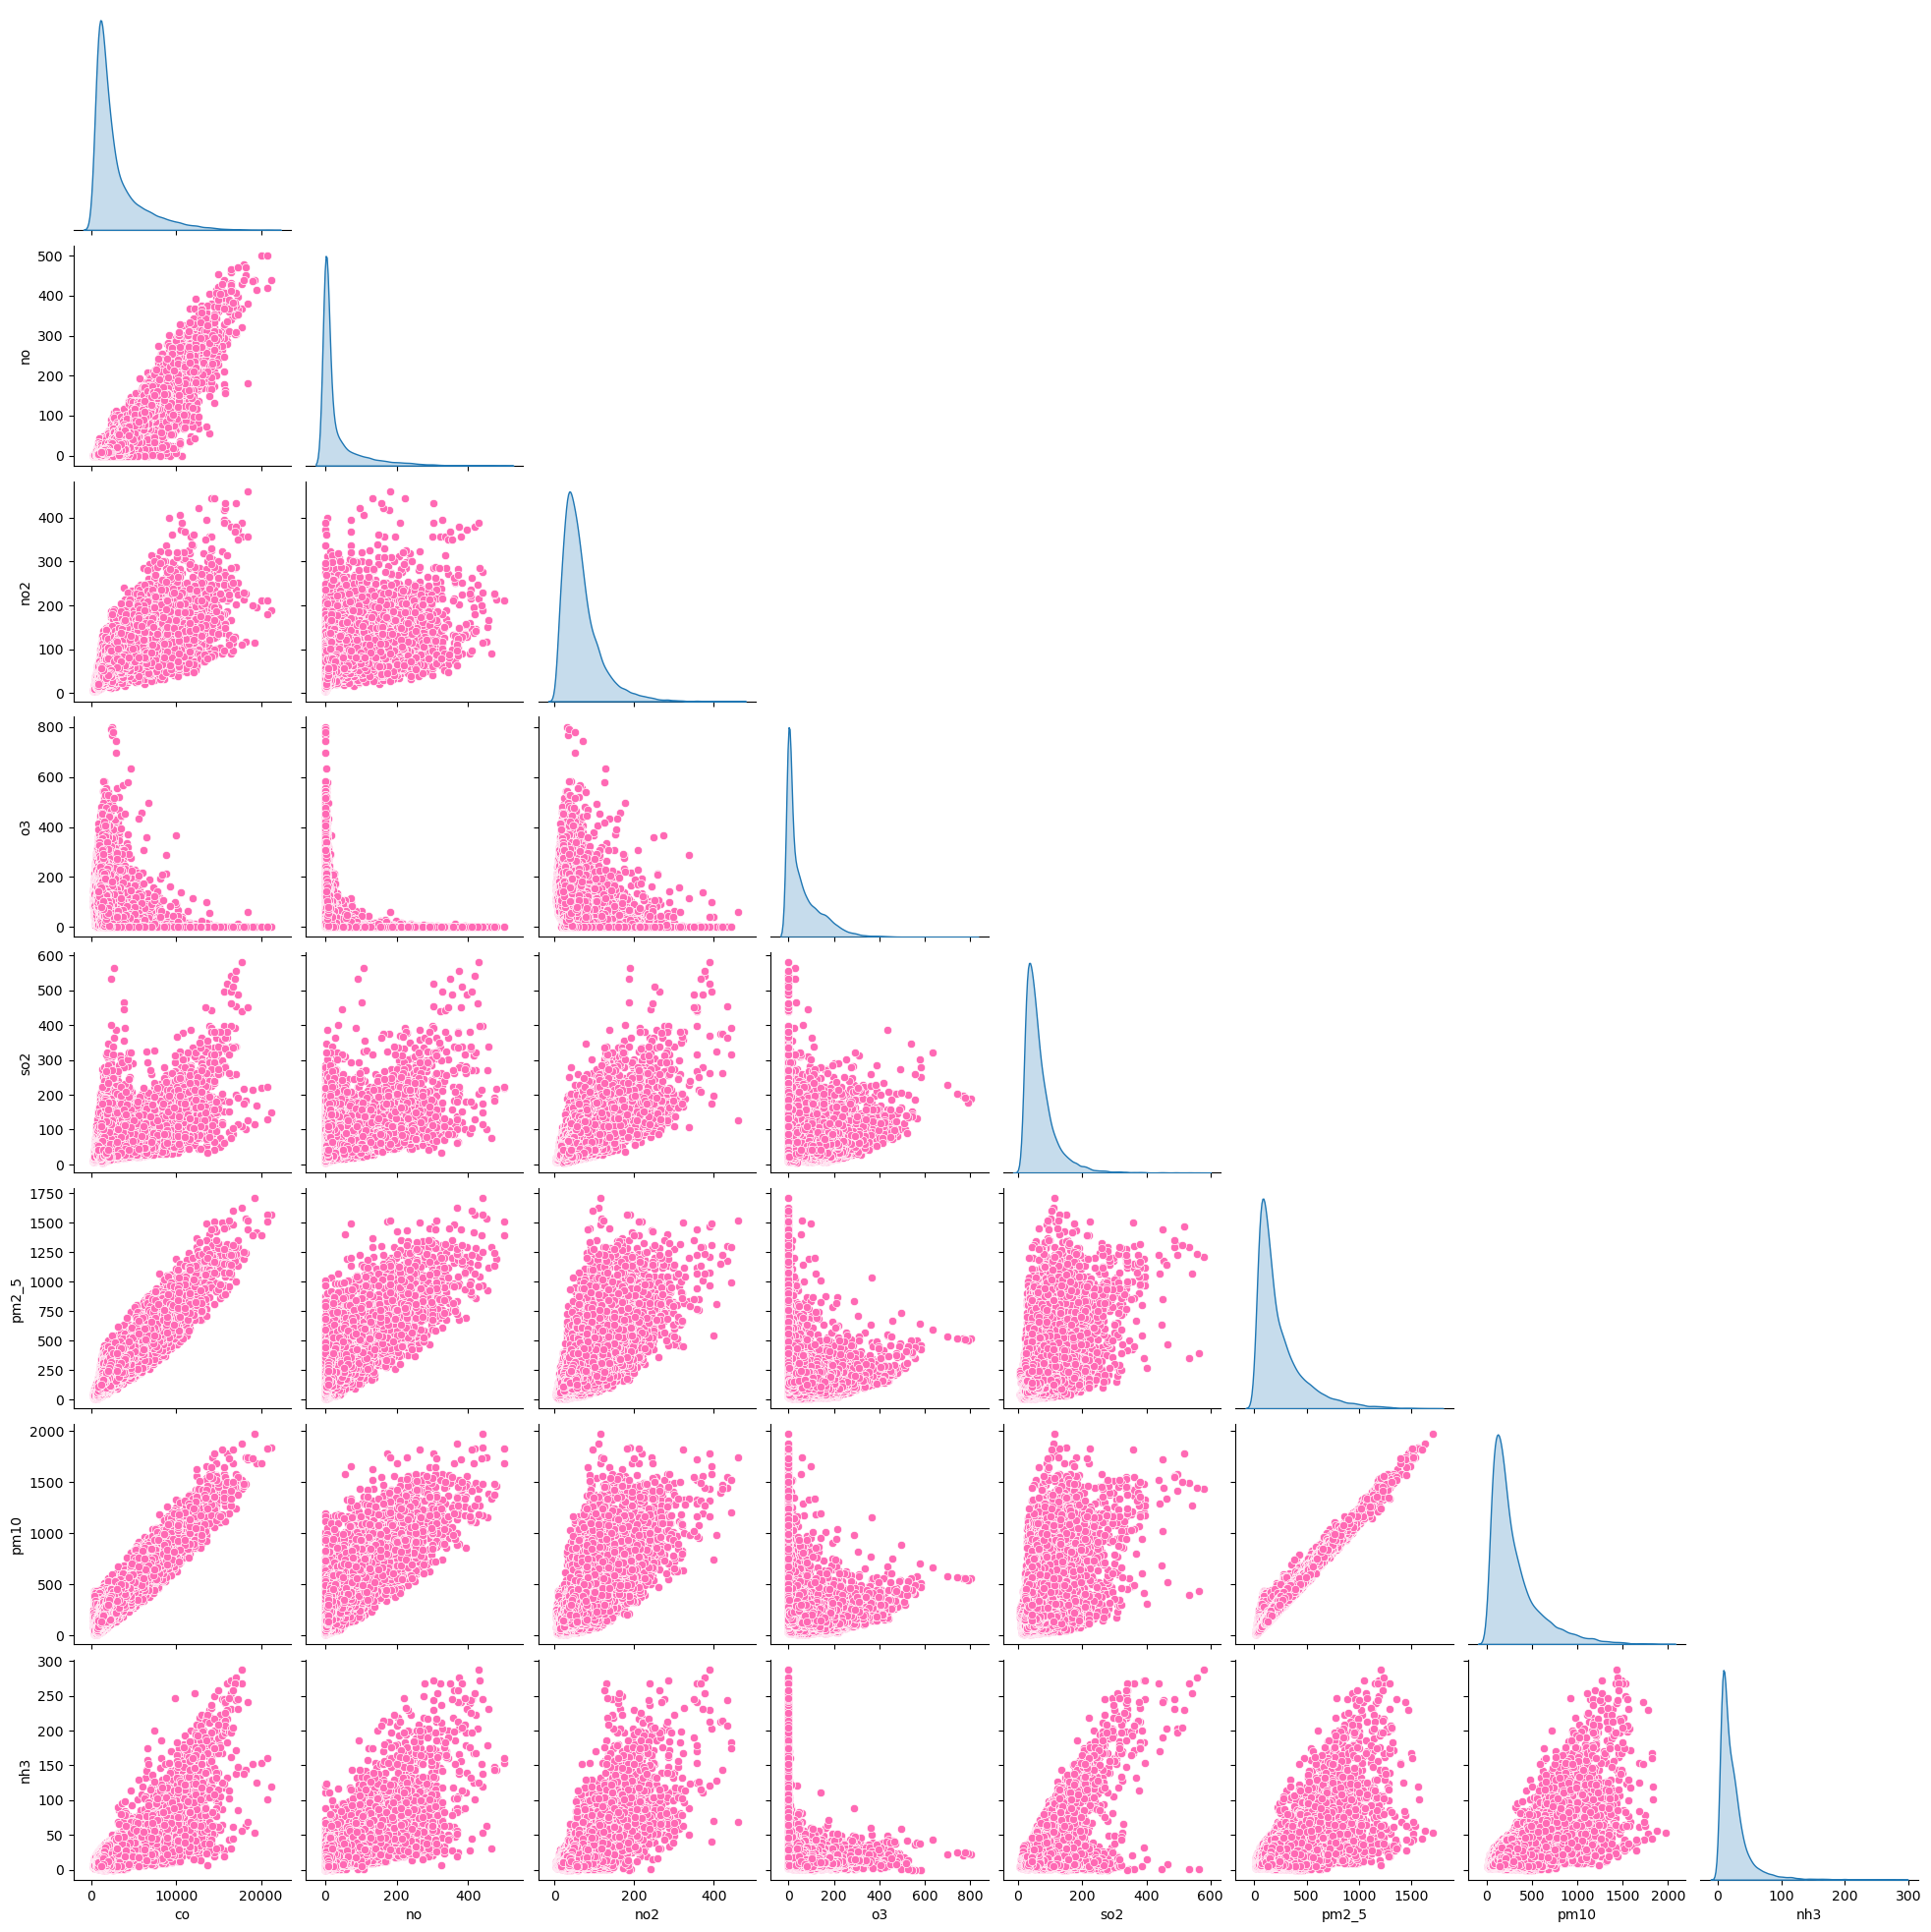

In [7]:
#creating pairplot
sns.pairplot(df_n, diag_kind='kde', corner=True, plot_kws={'color': 'hotpink'})
plt.savefig("pairplot.pdf")
plt.show()

Linear Corelation 

using pm10 and pm2_5 since they have a strong linear correlation (0.99) 

In [24]:
#Using pm10 as the dependent variable so asking, Can i predict pm10 based on pm2_5?
mod=smf.ols(formula='df["pm2_5"]~df["pm10"]',data=df)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            df["pm2_5"]   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 8.625e+05
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:43:48   Log-Likelihood:                -92328.
No. Observations:               18776   AIC:                         1.847e+05
Df Residuals:                   18774   BIC:                         1.847e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.5978      0.363    -37.470      0.0

In [25]:
#creating a table with summary of info from regression 
#saving regression result 
params=res.params
pvalues=res.pvalues
conf=res.conf_int()
r2=res.rsquared
adj_r2=res.rsquared_adj

#create a summary table 
reg_table = pd.DataFrame({
    'Coefficient':params,
    'p-Value':pvalues,
    '95% CI lower':conf[0],
    '95% CI upper':conf[1],
})
print(reg_table)

#printing r squared and adjusted to see how good the model is 
print(f'R-squared : {r2:5f}')
print(f'R-squared adjusted : {adj_r2:5f}')


            Coefficient        p-Value  95% CI lower  95% CI upper
Intercept    -13.597754  2.174818e-296    -14.309074    -12.886434
df["pm10"]     0.838834   0.000000e+00      0.837063      0.840604
R-squared : 0.978697
R-squared adjusted : 0.978696


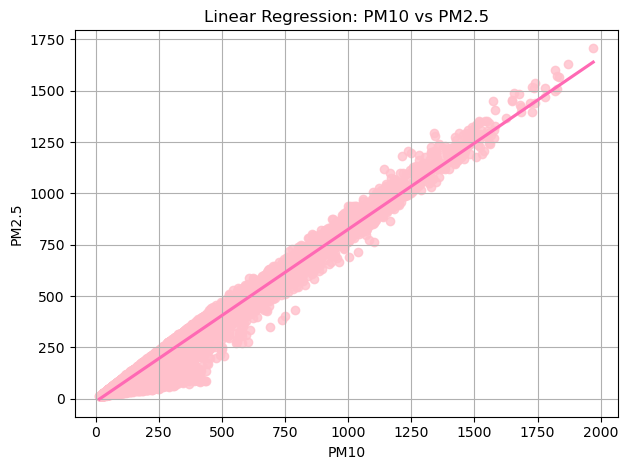

In [26]:
#plotting this 
sns.regplot(x='pm10', y='pm2_5', data=df, line_kws={'color': 'hotpink'},color='pink')
plt.title('Linear Regression: PM10 vs PM2.5')
plt.xlabel('PM10')
plt.ylabel('PM2.5')
plt.grid(True)
plt.tight_layout()
plt.show()

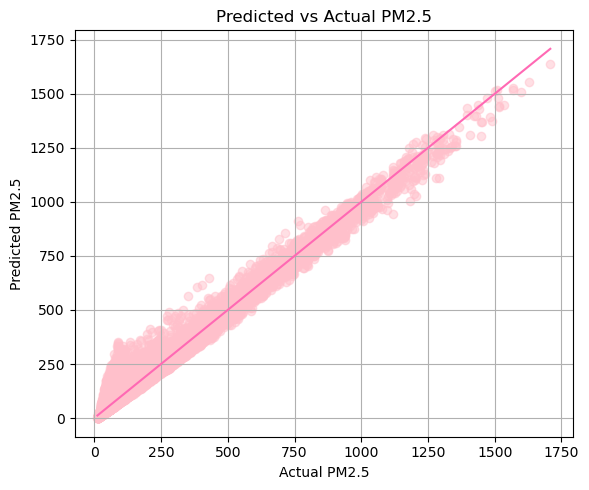

In [27]:
mod = smf.ols(formula='pm2_5 ~ pm10', data=df)
res = mod.fit()

# Get predicted values from the fitted model
predicted_pm2_5 = res.predict(df)
actual_pm2_5 = df['pm2_5']
predicted_pm2_5 = res.fittedvalues
actual_pm2_5 = df['pm2_5']

plt.figure(figsize=(6, 5))
plt.scatter(actual_pm2_5, predicted_pm2_5, alpha=0.5, color='pink')
plt.plot([actual_pm2_5.min(), actual_pm2_5.max()],
         [actual_pm2_5.min(), actual_pm2_5.max()],
          color='hotpink')
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Predicted vs Actual PM2.5")
plt.grid(True)
plt.tight_layout()
plt.show()

multiple liner regression of co

In [28]:
#linear regression of pollutant against co 
not_co = df_n.drop(columns=['co'])  # all but CO
co = df_n['co']

not_co = sm.add_constant(not_co)
mod = sm.OLS(co, not_co).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                     co   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.461e+05
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:43:51   Log-Likelihood:            -1.3833e+05
No. Observations:               18776   AIC:                         2.767e+05
Df Residuals:                   18768   BIC:                         2.767e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.5806      6.279     39.750      0.0

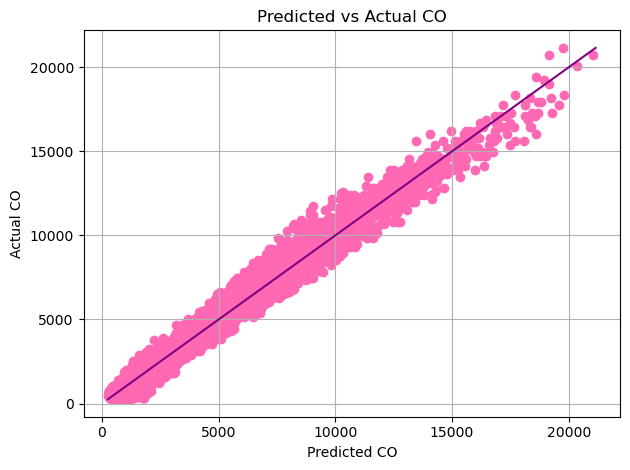

In [29]:
#plotting it 
p_co = mod.fittedvalues
plt.scatter(p_co, co, color='hotpink')
plt.plot([co.min(), co.max()], [co.min(), co.max()], color='purple', )  # ideal line
plt.xlabel("Predicted CO")
plt.ylabel("Actual CO")
plt.title("Predicted vs Actual CO")
plt.grid(True)
plt.tight_layout()
plt.savefig("co_graph")
plt.show()

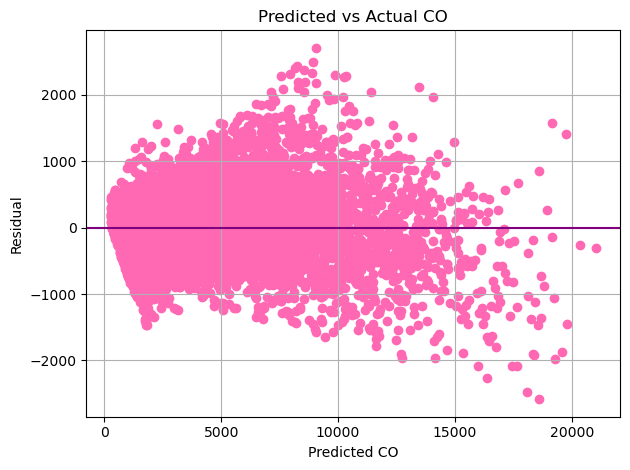

In [30]:
#plotting residual 
re = co-p_co
plt.scatter(p_co, re, color='hotpink')
plt.axhline(0,color='purple' )  # ideal line
plt.xlabel("Predicted CO")
plt.ylabel("Residual")
plt.title("Predicted vs Actual CO")
plt.grid(True)
plt.tight_layout()
plt.savefig("pre_graph")
plt.show()

Backward elimination, dropping predictors with p values bigger than 0.05

In [31]:
print(mod.pvalues.sort_values(ascending=False))

pm2_5     2.000972e-69
o3       2.531713e-121
no        0.000000e+00
const     0.000000e+00
no2       0.000000e+00
so2       0.000000e+00
pm10      0.000000e+00
nh3       0.000000e+00
dtype: float64


All value are smaller than 0.05 so nothing to eliminates 

In [32]:
#creating a table with summary of info from regression 
#saving regression result 
params_co=mod.params
pvalues_co=mod.pvalues
conf_co=mod.conf_int()
r2_co=mod.rsquared
adj_r2_co=mod.rsquared_adj

#create a summary table 
reg_table_co = pd.DataFrame({
    'Coefficient':params_co,
    'p-Value':pvalues_co,
    '95% CI lower':conf_co[0],
    '95% CI upper':conf_co[1],
})
print(reg_table_co)

#printing r squared and adjusted to seehow good teh model is 
print(f'R-squared : {r2_co:.4f}')
print(f'R-squared adjusted : {adj_r2_co:.4f}')

       Coefficient        p-Value  95% CI lower  95% CI upper
const   249.580638   0.000000e+00    237.273648    261.887628
no       18.371737   0.000000e+00     18.173250     18.570224
no2      13.168407   0.000000e+00     12.918195     13.418619
o3       -1.032664  2.531713e-121     -1.118450     -0.946878
so2      -5.564197   0.000000e+00     -5.755768     -5.372626
pm2_5     1.622876   2.000972e-69      1.443007      1.802745
pm10      3.266309   0.000000e+00      3.106455      3.426162
nh3      10.194224   0.000000e+00      9.797380     10.591068
R-squared : 0.9820
R-squared adjusted : 0.9820


Since all p values are low, using backward elimination on values that have a correlation less than 0.7 with co and pm10 to avoid multicollinearity since it's too similar to pm2.5. Also nh3 since it has a high standart error. 

In [33]:
df_be = not_co.drop(columns=['o3','so2','nh3','pm10'])

df_be = sm.add_constant(df_be)
model = sm.OLS(co, df_be).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     co   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 2.017e+05
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:43:52   Log-Likelihood:            -1.4314e+05
No. Observations:               18776   AIC:                         2.863e+05
Df Residuals:                   18772   BIC:                         2.863e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        130.8218      6.409     20.412      0.0

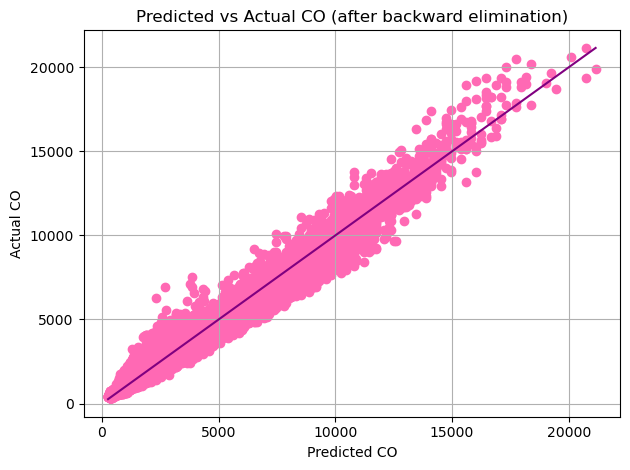

In [34]:
#plotting it 
predicted_co = model.fittedvalues
plt.scatter(co,predicted_co, color='hotpink')
plt.plot([co.min(), co.max()], [co.min(), co.max()], color='purple', )  # ideal line
plt.xlabel("Predicted CO")
plt.ylabel("Actual CO")
plt.title("Predicted vs Actual CO (after backward elimination)")
plt.grid(True)
plt.tight_layout()
plt.savefig("co_graph_be")
plt.show()

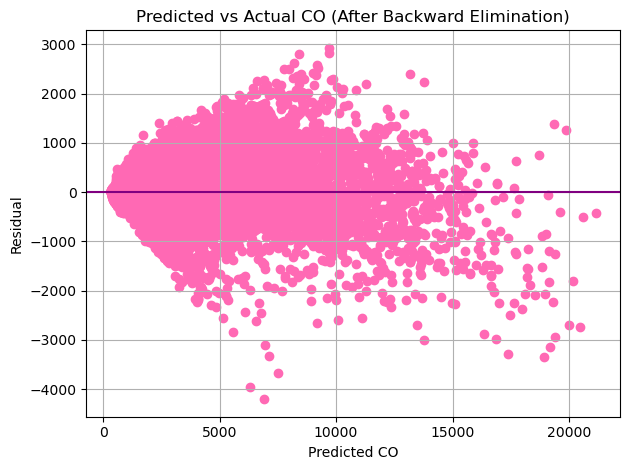

In [35]:
#plotting residual 
res = co-predicted_co
plt.scatter(predicted_co, res, color='hotpink')
plt.axhline(0,color='purple' )  # ideal line
plt.xlabel("Predicted CO")
plt.ylabel("Residual")
plt.title("Predicted vs Actual CO (After Backward Elimination)")
plt.grid(True)
plt.tight_layout()
plt.savefig("pre_graph_be")  
plt.show()